In [44]:
#Hist rates for forwards 

import pandas as pd
import numpy as np 
from scipy.stats import norm 
import scipy.interpolate

MC_Rates = pd.read_csv('Port3_MC_sim_price3.csv')

MC_zero_rates = MC_Rates.iloc[:,0:8] * [-0.0387, -0.4145, 2.2144, -0.8548, 1.0211,0.9495,0.9289,0.9017]

aus_hist_zero = pd.read_csv('For_Aus_Zero.csv')
X = [0,30,60,90,180,270,365,730,1095,1460]

tointerp = [123, 247, 276, 374] 

Dateindex = list(range(0,9999))

'''df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, aus_hist_zero.iloc[row, 1:], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_aus_rates = pd.DataFrame(df, columns = tointerp)
#interp_aus_rates'''
act_aus_rates = [1.0211,0.9495,0.9289,0.9017]
act_aus_rates = pd.DataFrame(act_aus_rates)
interp_aus_rates = MC_zero_rates.iloc[:, 4:8]
interp_aus_rates.columns = tointerp
Disfact = pd.DataFrame()
for i in Dateindex:
    for j in tointerp:
        val = (interp_aus_rates.loc[i, j] / 100) * (j / 365)
        Disfact.loc[i,j] = np.exp(-val)
        

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))
jtest = [0,1,2,3]
MC_aus_rate = pd.DataFrame()
for i in list(range(0,9998)):
    for j in jtest:
        MC_aus_rate.loc[i, j] = (1+ df.iloc[i,j]) * act_aus_rates.iloc[j,0]

In [45]:
MC_aus_rate

,0,1,2,3
0,1.021111,0.949528,0.928893,0.901709
1,1.021097,0.949496,0.928905,0.901701
2,1.021109,0.949511,0.928885,0.901702
3,1.021088,0.949485,0.928917,0.901698
4,1.021103,0.949499,0.928890,0.901698
5,1.021120,0.949539,0.928871,0.901694
6,1.021068,0.949443,0.928949,0.901705
7,1.021107,0.949515,0.928890,0.901701
8,1.021106,0.949509,0.928894,0.901701
9,1.021090,0.949474,0.928907,0.901697


In [50]:
#EUR Rates
eur_hist_zero = pd.read_csv('EUR_zero_rate.csv')
X = [182.5, 273.5, 365]

tointerp = 247 

Dateindex = list(range(0,9999))

'''df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, eur_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []'''

#interp_eur_rates = pd.DataFrame(df, columns = tointerp)

interp_eur_rates = MC_zero_rates.iloc[:, 1]
interp_eur_rates.columns = tointerp
Disfact = []
for i in Dateindex:
    val = (interp_eur_rates.iloc[i] / 100) * (247 / 365)
    Eur_DF = np.exp(-val)
    Disfact.append(Eur_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

MC_eur_rate = pd.DataFrame()
for i in list(range(0,9998)):
    MC_eur_rate.loc[i, 'MC'] = (1+ df.iloc[i,0]) * -0.4145
#test = (1+ln_dis) * eur_interp_rates.iloc[2761,0]
#test
#interp_eur_rates


In [53]:
MC_zero_rates

,JPY_int,EUR_int,US_int,Swiss_int,AZC_123,AZC_247,AZC_276,AZC_374
0,-0.038702,-0.414589,2.213436,-0.856258,1.024897,0.953751,0.927113,0.902421
1,-0.038688,-0.414722,2.215055,-0.856153,1.021606,0.949465,0.928127,0.901440
2,-0.038695,-0.414636,2.215239,-0.856036,1.022486,0.950012,0.927412,0.901314
3,-0.038693,-0.414719,2.213259,-0.854829,1.019833,0.948314,0.929494,0.901144
4,-0.038702,-0.414433,2.214780,-0.855506,1.023246,0.950589,0.927131,0.901399
5,-0.038698,-0.414690,2.212008,-0.855446,1.022353,0.950799,0.928601,0.901669
6,-0.038695,-0.414431,2.214868,-0.852851,1.016474,0.944748,0.932667,0.902284
7,-0.038700,-0.414723,2.214154,-0.857328,1.025705,0.953659,0.925741,0.901796
8,-0.038703,-0.414525,2.213460,-0.856009,1.023630,0.951387,0.927100,0.901687
9,-0.038705,-0.414498,2.214780,-0.855138,1.021901,0.949967,0.927987,0.901535


In [3]:
#USD Rates
usd_hist_zero = pd.read_csv('USD_zero_forward.csv')
X = [60,90,182.5]

tointerp = 123 

Dateindex = list(range(0,9999))

'''df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, usd_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_usd_rates = pd.DataFrame(df, columns = tointerp)'''
#interp_usd_rates
interp_usd_rates = MC_zero_rates.iloc[:, 2]
interp_usd_rates.columns = tointerp
Disfact = []
for i in Dateindex:
    val = (interp_usd_rates.iloc[i, 0] / 100) * (123 / 365)
    USD_DF = np.exp(-val)
    Disfact.append(USD_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

MC_USD_rate = pd.DataFrame()
for i in list(range(0,9998)):
    HS_USD_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * 2.2144

In [4]:
#JPY Rates
jpy_hist_zero = pd.read_csv('JPY_zero_rate.csv')
X = [273.5, 365]

tointerp = [276] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, jpy_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_jpy_rates = pd.DataFrame(df, columns = tointerp)
#interp_jpy_rates

Disfact = []
for i in Dateindex:
    val = (interp_usd_rates.iloc[i, 0] / 100) * (276 / 365)
    jpy_DF = np.exp(-val)
    Disfact.append(jpy_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_jpy_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_jpy_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_jpy_rates.iloc[2761,0]

In [5]:
#CHF Rates
chf_hist_zero = pd.read_csv('CHF_zero_rates.csv')
X = [365, 730]

tointerp = [374] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, chf_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_chf_rates = pd.DataFrame(df, columns = tointerp)
#interp_chf_rates
Disfact = []
for i in Dateindex:
    val = (interp_chf_rates.iloc[i, 0] / 100) * (374 / 365)
    chf_DF = np.exp(-val)
    Disfact.append(chf_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_chf_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_chf_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_chf_rates.iloc[2761,0]

In [6]:
forwards = pd.read_csv('For_for_exch.csv')

def lectfor(buy, S, y, t, sell, r):
    y = y/100
    r = r/100
    price = ((buy*1000000) * (1 / S) * np.exp(-y *(t/365))) - ((sell*1000000) * np.exp(-r*(t/365)))
    return price 

#Forward Contract
# S = spot price of one unit of cash asset
# K = contracted forward price
# r = domestic risk free rate 
# y = income flow on the asset (forein risk free rate r* when asset is foreign currency) 
# t = time to maturity 

def forward(S, K, r, y, t):
    
    f = S * np.exp(-y * t) - K * np.exp(-r * t)
    
    return f



In [7]:
forward_hs_sim = pd.read_csv('HS_sim_for_price.csv')
#forward_hs_sim

In [56]:
##USD FORWARD

df = pd.DataFrame()
Dateindex = list(range(0,9999))
outtest = pd.DataFrame()
outtest['USD Price'] = ""

for x in Dateindex:
    r = MC_zero_rates.iloc[x,4] #USD maturity
    y = MC_zero_rates.iloc[x,2]
    S = MC_Rates.loc[x,'USD']
    outtest.loc[x, 'USD Price']  = lectfor(
            forwards.loc[0, 'Buy Amount '],
            S,
            y,
            forwards.loc[0, 'Maturity'],
            forwards.loc[0, 'Sell amount '],
            r
                                )
#outtest

In [57]:
outtest['EUR Price'] = ""

for x in Dateindex:
    r = MC_zero_rates.iloc[x,5] #EUR maturity
    y = MC_zero_rates.iloc[x,1]
    S = MC_Rates.loc[x,'EUR']
    outtest.loc[x, 'EUR Price']  = lectfor(
            forwards.loc[1, 'Buy Amount '],
            S,
            y,
            forwards.loc[1, 'Maturity'],
            forwards.loc[1, 'Sell amount '],
            r
                                )
#outtest

In [58]:
outtest['JPY Price'] = ""

for x in Dateindex:
    r = MC_zero_rates.iloc[x,6] #JPY maturity
    y = MC_zero_rates.iloc[x,0]
    S = MC_Rates.loc[x,'JPY']
    outtest.loc[x, 'JPY Price']  = lectfor(
            forwards.loc[2, 'Buy Amount '],
            S,
            y,
            forwards.loc[2, 'Maturity'],
            forwards.loc[2, 'Sell amount '],
            r
                                )
  

In [59]:
outtest['CHF Price'] = ""

for x in Dateindex:
    r = MC_zero_rates.iloc[x,3] #CHF maturity
    y = MC_zero_rates.iloc[x,7]
    S = MC_Rates.loc[x,'CHF']
    outtest.loc[x, 'CHF Price']  = lectfor(
            forwards.loc[3, 'Buy Amount '],
            S,
            y,
            forwards.loc[3, 'Maturity'],
            forwards.loc[3, 'Sell amount '],
            r
                                )

In [60]:
forwards

,Expiry,Maturity,Buy Currency,Buy Amount,Sell Currency,Sell amount,K,S,r,y
0,3/12/2019,123,USD,25,AUD,37.31343,0.67,0.6812,NaN,NaN
1,5/04/2020,247,EUR,20,AUD,32.25806,0.62,0.6148,NaN,NaN
2,4/05/2020,276,JPY,900,AUD,10.94891,82.20,72.9700,NaN,NaN
3,10/08/2020,374,CHF,35,AUD,47.29730,0.74,0.6738,NaN,NaN


In [61]:
outtest

,USD Price,EUR Price,JPY Price,CHF Price
0,-258054,864320,1.46748e+06,4.47615e+06
1,-1.31139e+06,127130,1.4641e+06,3.53464e+06
2,-1.0709e+06,489246,1.46538e+06,4.02925e+06
3,-1.29695e+06,-280247,1.46258e+06,2.55467e+06
4,-588277,865280,1.46672e+06,4.24488e+06
5,-490937,192242,1.46605e+06,3.45767e+06
6,-950018,258747,1.46415e+06,2.84783e+06
7,-669671,663049,1.46661e+06,4.60587e+06
8,-316745,883561,1.46688e+06,4.68395e+06
9,-635444,842758,1.46579e+06,4.4067e+06


In [62]:
outtest['Portfolio'] = outtest.sum(axis=1)
outtest['PnL'] = outtest['Portfolio'] - 6816712.610575922  #mtm 

In [63]:
outtest

,USD Price,EUR Price,JPY Price,CHF Price,Portfolio,PnL
0,-258054,864320,1.46748e+06,4.47615e+06,6.549901e+06,-2.668116e+05
1,-1.31139e+06,127130,1.4641e+06,3.53464e+06,3.814483e+06,-3.002230e+06
2,-1.0709e+06,489246,1.46538e+06,4.02925e+06,4.912979e+06,-1.903734e+06
3,-1.29695e+06,-280247,1.46258e+06,2.55467e+06,2.440051e+06,-4.376662e+06
4,-588277,865280,1.46672e+06,4.24488e+06,5.988604e+06,-8.281086e+05
5,-490937,192242,1.46605e+06,3.45767e+06,4.625028e+06,-2.191685e+06
6,-950018,258747,1.46415e+06,2.84783e+06,3.620715e+06,-3.195998e+06
7,-669671,663049,1.46661e+06,4.60587e+06,6.065853e+06,-7.508596e+05
8,-316745,883561,1.46688e+06,4.68395e+06,6.717647e+06,-9.906519e+04
9,-635444,842758,1.46579e+06,4.4067e+06,6.079799e+06,-7.369139e+05


-3649200.3039989006

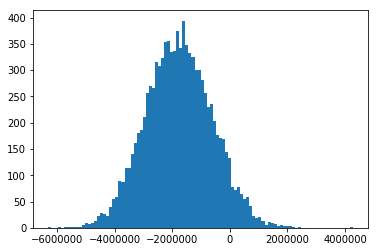

In [64]:
PnL = np.array(outtest['PnL'])
PnL.sort()
import matplotlib.pyplot as plt
plt.hist(PnL, bins = 100)
np.percentile(PnL, 5)

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan

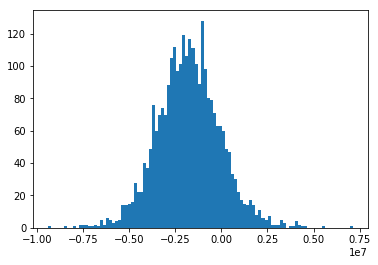

In [65]:
opt_pnl_1 = pd.read_csv('opt_pnlvec_1.csv')

opt_pnl_2 = pd.read_csv('opt_pnlvec_2.csv')

port_pnl_1 = outtest['PnL'] + opt_pnl_1['PnL Vec']

port_pnl_1 = np.array(port_pnl_1)
port_pnl_1.sort()
import matplotlib.pyplot as plt
plt.hist(port_pnl_1, bins = 100)
np.percentile(port_pnl_1, 5)

nan

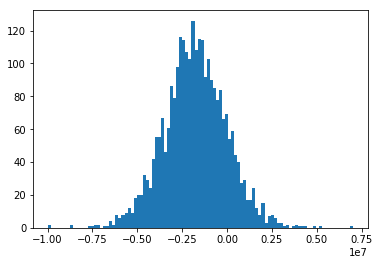

In [66]:
port_pnl_2 = outtest['PnL'] + opt_pnl_2['PnL Vec']

port_pnl_2 = np.array(port_pnl_2)
port_pnl_2.sort()
import matplotlib.pyplot as plt
plt.hist(port_pnl_2, bins = 100)
np.percentile(port_pnl_2, 5)

-2058908.76025

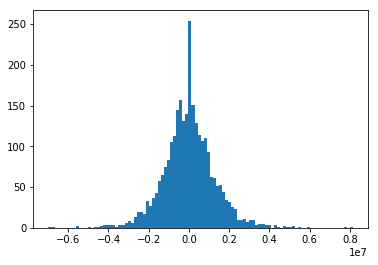

In [19]:
opt_pnl_1 = np.array(opt_pnl_1)
opt_pnl_1.sort()
import matplotlib.pyplot as plt
plt.hist(opt_pnl_1, bins = 100)
np.percentile(opt_pnl_1, 5)

In [32]:
HS_aus_rate

,0,1,2,3
0,1.021087,0.947225,0.928096,0.901752
1,1.020281,0.946808,0.927705,0.901496
2,1.020220,0.946816,0.927915,0.901706
3,1.020503,0.946991,0.927915,0.901716
4,1.020319,0.946969,0.927915,0.901726
5,1.020463,0.946940,0.927915,0.901731
6,1.020654,0.947084,0.927915,0.901737
7,1.020464,0.946999,0.927915,0.901714
8,1.020460,0.946999,0.927915,0.901738
9,1.020513,0.947132,0.927915,0.901718
